### Употреба и визуелизација на Брза Фуриева Трансформација во делот - "Дигитално процесирање на слики со употреба на ниско и високопопусен Гаусов филтер"

###### Дел од кодот за визуелизација на оваа целина од проектот е преземен од следната страна: https://www.datadriveninvestor.com/2020/10/23/fourier-transform-for-image-processing-in-python-from-scratch/#

#### Процесот на процесирање на слика со употреба на БФТ се одвива во следните чекори:
1. Приказ на сликата во grayscale формат
2. Креирање на фреквенциски спектар со цел подобро разбирање и приказ
3. Центрирање на ниските фреквенции во средината со помош на БФТ
4. Децентрализација, односно враќање во првобитниот спектар од чекор 2
5. Претворање од фреквенциски домен во слика, со употреба на инверзна БФТ и приказ на финална процесирана слика

 Во првиот чекор се врши приказ на сликата, со користење на соодветен пакет за вчитување (може да се употреби "cv2" од "opencv" или "mpimg" од "matplotlib.image"). Притоа, сликата се прикажува во grayscale формат


(<matplotlib.axes._subplots.AxesSubplot at 0x191a00f3dc8>,
 Text(0.5, 1.0, 'Оригинална слика'))

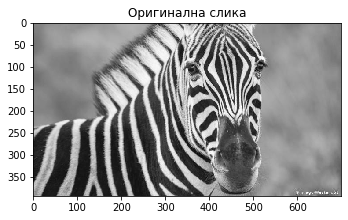

In [2]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftfreq
import cv2
import numpy as np
from matplotlib import pyplot as plt
from math import sqrt,exp
plt.figure(figsize = (6.4*5, 4.8*5), constrained_layout = False)
import matplotlib.image as mpimg 
slika = cv2.imread("C:\\Users\\atana\\OneDrive\\Desktop\\zebra.jpg",0)      
plt.subplot(151), plt.imshow(slika, "gray"), plt.title("Оригинална слика")

Во вториот чекор се прикажува спектарот на фреквенции, така што од numpy пакетот, се користи готовата функција за БФТ, при што за добивање на спектарот е потребно дискретните вредности на пикселите да се трансформираат во соодветен фреквенциски домен. 

(<matplotlib.image.AxesImage at 0x191a10ff808>,
 Text(0.5, 1.0, 'Фреквенциски спектар'))

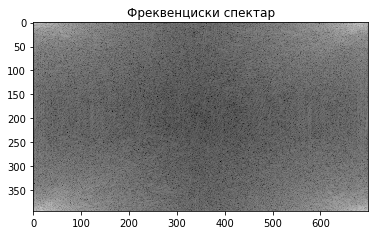

In [3]:
frekvenciski_spektar = np.fft.fft2(slika)
plt.imshow(np.log(1+np.abs(frekvenciski_spektar)), "gray"), plt.title("Фреквенциски спектар")

Белите точки на краевите од спектарот се индикатор за постоењето на ниските фреквенции

Во третиот чекор, се врши центрирање на овие фреквенции и нивно прикажување во центарот, додека останатиот дел од сликата ги содржи високите фреквенции

(<matplotlib.image.AxesImage at 0x191a080ef08>,
 Text(0.5, 1.0, 'Спектар на центрирани фреквенции'))

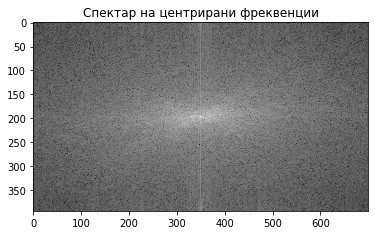

In [4]:
centriranje_frekvencii=np.fft.fftshift(frekvenciski_spektar)
plt.imshow(np.log(1+np.abs(centriranje_frekvencii)), "gray"), plt.title("Спектар на центрирани фреквенции")

Во четвртиот чекор се врши враќање на ниските фреквенции на аглите од спектарот, при што спектарот ќе го добие истиот изглед како во вториот чекор. Истото се добива на следниот начин:

(<matplotlib.image.AxesImage at 0x191a0eeea88>,
 Text(0.5, 1.0, 'Децентрализиран спектар'))

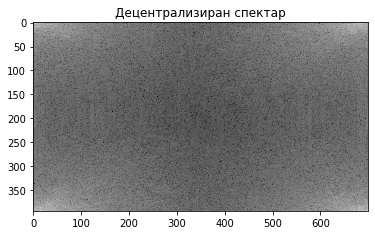

In [5]:
decentraliziran_spektar=np.fft.ifftshift(centriranje_frekvencii)
plt.imshow(np.log(1+np.abs(decentraliziran_spektar)), "gray"), plt.title("Децентрализиран спектар")


Во последниот чекор, се врши враќање на сликата од фреквенциски домен во оригинална форма. Истото се постигнува со употреба на инверзна БФТ. Финална процесирана слика изгледа вака:

(<matplotlib.image.AxesImage at 0x191a0ce2dc8>,
 Text(0.5, 1.0, 'Процесирана слика'))

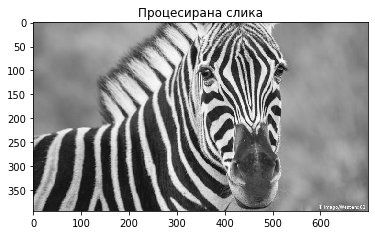

In [6]:
procesirana_slika=np.fft.ifft2(decentraliziran_spektar)
plt.imshow(np.abs(procesirana_slika), "gray"), plt.title("Процесирана слика")

##### Приказ на листа од целокупниот процес:

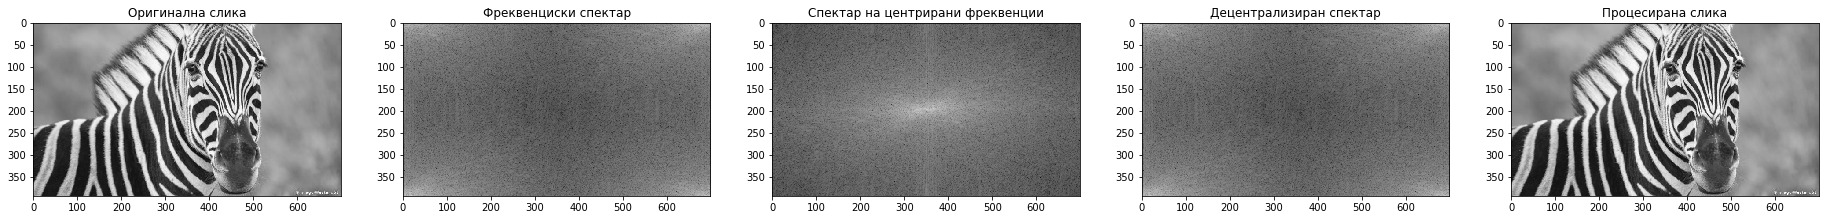

In [7]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
# 1
slika=cv2.imread("C:\\Users\\atana\\OneDrive\\Desktop\\zebra.jpg",0)
plt.subplot(151), plt.imshow(slika,"gray"), plt.title("Оригинална слика")
# 2
frekvenciski_spektar=np.fft.fft2(slika)
plt.subplot(152), plt.imshow(np.log(1+np.abs(frekvenciski_spektar)), "gray"), plt.title("Фреквенциски спектар")
# 3
centriranje_frekvencii=np.fft.fftshift(frekvenciski_spektar)
plt.subplot(153),plt.imshow(np.log(1+np.abs(centriranje_frekvencii)), "gray"), plt.title("Спектар на центрирани фреквенции")
# 4
decentraliziran_spektar=np.fft.ifftshift(centriranje_frekvencii)
plt.subplot(154), plt.imshow(np.log(1+np.abs(decentraliziran_spektar)), "gray"), plt.title("Децентрализиран спектар")
# 5
procesirana_slika=np.fft.ifft2(decentraliziran_spektar)
plt.subplot(155), plt.imshow(np.abs(procesirana_slika), "gray"), plt.title("Процесирана слика")
# приказ на листа од целокупниот процес
plt.show()

За да се комплетира целокупниот процес, неопходна е употреба на филтри за дигиталното процесирање на слики. За таа цел се користат нископропусни и високопропусни филтри.


##### Дефинирање и разлика помеѓу филтрите пропусни на ниски и високи фреквенции

|Low Pass (Нископропусен)||High Pass (Високопропусен)|
|----||----|
|Овозможува само ниските фреквенции да поминат преку||Овозможува само високите фреквенции да поминат преку|
|Високите фреквенции (пр. шум) се блокирани со што се овозможува процесираната слика да има помалку пиксели на шум||Високите фреквенции во сликите означуваат дека вредностите на пикселите  драстично се менуваат|
|Ниските фреквенции во сликите означуваат дека вредностите на пикселите  бавно се менуваат||Резултатот од ваквиот филтер ги доловува рабовите на сликата што може да се користат за изострување на оригиналната слика со соодветна пресметка на преклопување|
|Се користи за отстранување на шум на сликите||Се подобрува острината во оригиналната слика, правејќи ги рабовите појасни|
|Ги зачувува целокупните информации на сликата||Ги идентификува промените на сликата|

Пример за видови на филтри од двете категории се: Butterworth, Ideal, Gaussian итн.

##### Обработка на Гаусовиот филтер

Дефинирање на Гаусовиот нископропусен филтер (Gaussian Low Pass Filter):
$$ H(u,v)=e^{-D^2(u,v)/2D_0 ^2}$$

Дефинирање на Гаусовиот високопропусен филтер (Gaussian High Pass Filter):
$$ H(u,v)=1 - e^{-D^2(u,v)/2D_0 ^2}$$

каде што е $D_0$ > 0 и $D (u,v)$ е оддалеченост помеѓу точката $(u,v)$ во фреквенцискиот домен и центарот на фреквенцискиот правоаголник

##### Алгоритамот за Гаусов филтер:

In [8]:
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

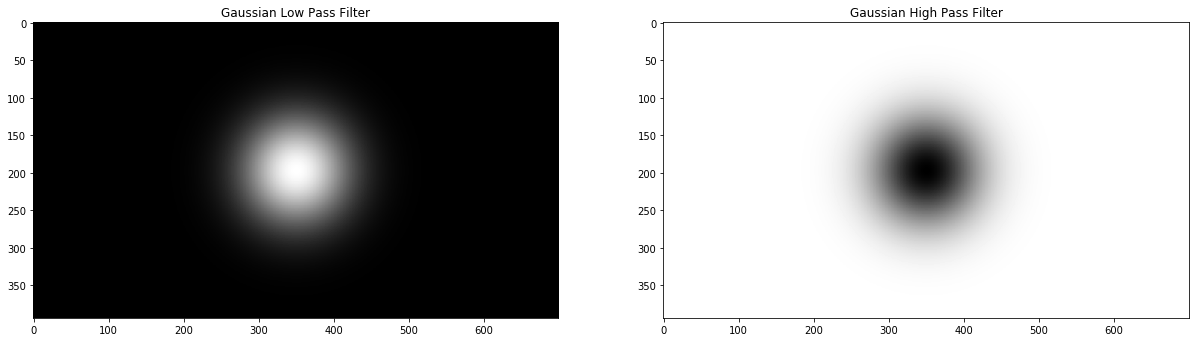

In [9]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
#D_0=50
LowPass = gaussianLP(50,slika.shape)
plt.subplot(131), plt.imshow(LowPass, "gray"), plt.title("Gaussian Low Pass Filter")

HighPass = gaussianHP(50,slika.shape)
plt.subplot(132), plt.imshow(HighPass, "gray"), plt.title("Gaussian High Pass Filter")

plt.show()

##### Приказ на Гаусовиот филтер, како дел од процесот:

(<matplotlib.image.AxesImage at 0x191a0ffa848>,
 Text(0.5, 1.0, 'Процесирана слика'))

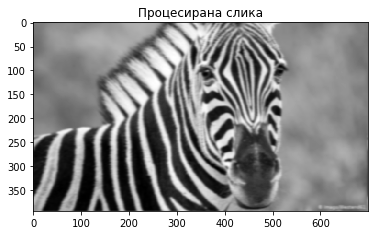

In [13]:
# Неопходно е дефинирање на inverse_LowPass
# доден дел од мене (недостасува во кодот од страната)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Процесирана слика")

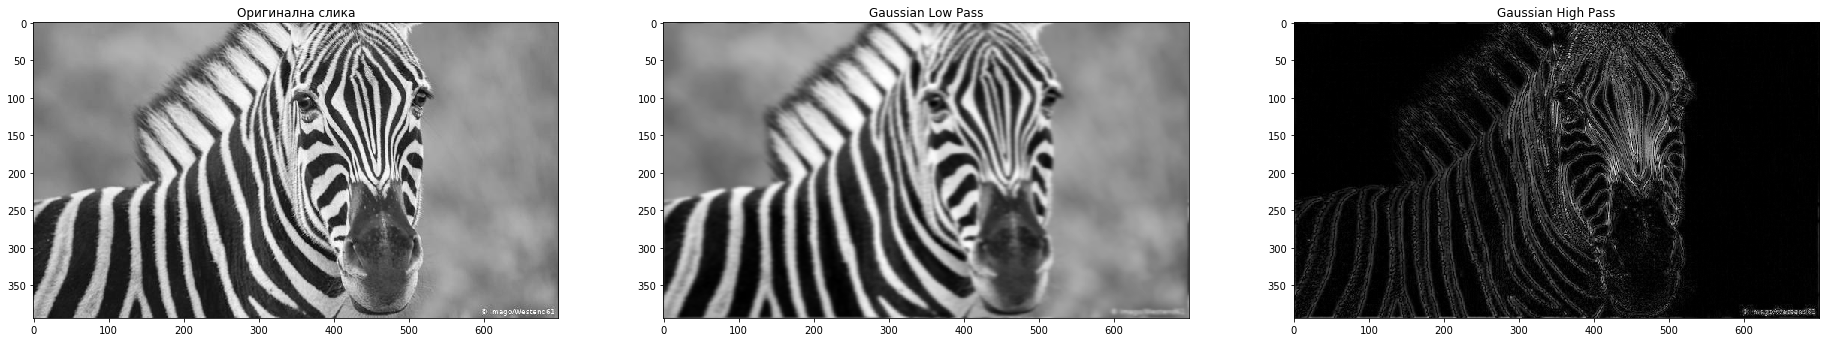

In [14]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

slika = cv2.imread("C:\\Users\\atana\\OneDrive\\Desktop\\zebra.jpg",0)
frekvenciski_spektar = np.fft.fft2(slika)
centriranje_frekvencii = np.fft.fftshift(frekvenciski_spektar)
plt.subplot(131), plt.imshow(slika,"gray"), plt.title("Оригинална слика")

LowPassCenter = centriranje_frekvencii*gaussianLP(50,slika.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
invese_LowPass = np.fft.ifft2(LowPass)
plt.subplot(132), plt.imshow(np.abs(inverse_LowPass),"gray"), plt.title("Gaussian Low Pass")

HighPassCenter = centriranje_frekvencii * gaussianHP(50,slika.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(133), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Gaussian High Pass")

plt.show()

##### Мој дел - Споредба на сликата со и слика со обично замаглување (blurred image):

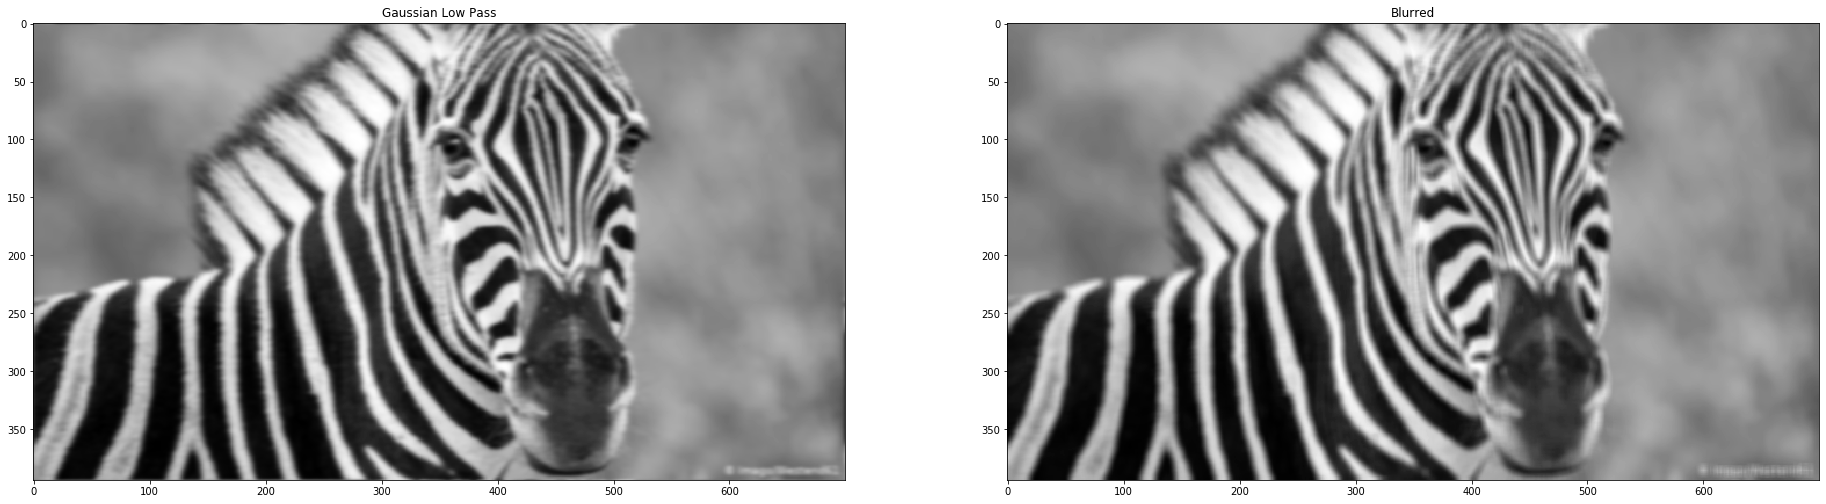

In [15]:
plt.figure(figsize = (6.4*5, 4.8*5), constrained_layout = False)
slika=cv2.imread("C:\\Users\\atana\\OneDrive\\Desktop\\zebra.jpg",0)
# Gaussian Low Pass Filter:
LowPassCenter = centriranje_frekvencii*gaussianLP(50,slika.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
invese_LowPass = np.fft.ifft2(LowPass)
plt.subplot(121), plt.imshow(np.abs(inverse_LowPass),"gray"), plt.title("Gaussian Low Pass")
# Blurred Image:
blur = cv2.blur(slika,(7,7))
plt.subplot(122), plt.imshow(blur, "gray"),plt.title('Blurred')
plt.show()

Доколку направам споредба помеѓу нископропусниот Гаусов филтер применет на сликата и повик на функцијаата "blur()" од библиотеката "cv2", можам со сигурност да речам дека визуелно нема никаква разлика, ниту во делот на заматување, ниту во доминацијата на боите. Но, идејата е да се покаже дека доколку примениме спектар со центрирани фреквенции и БФТ и ИФТ за добивање на процесирана слика со мало заматување, ќе го добиеме истиот ефект како и стандардна функција од python библиотека.

##### Мој дел - Приказ на спектар на големина и фазен спектар:

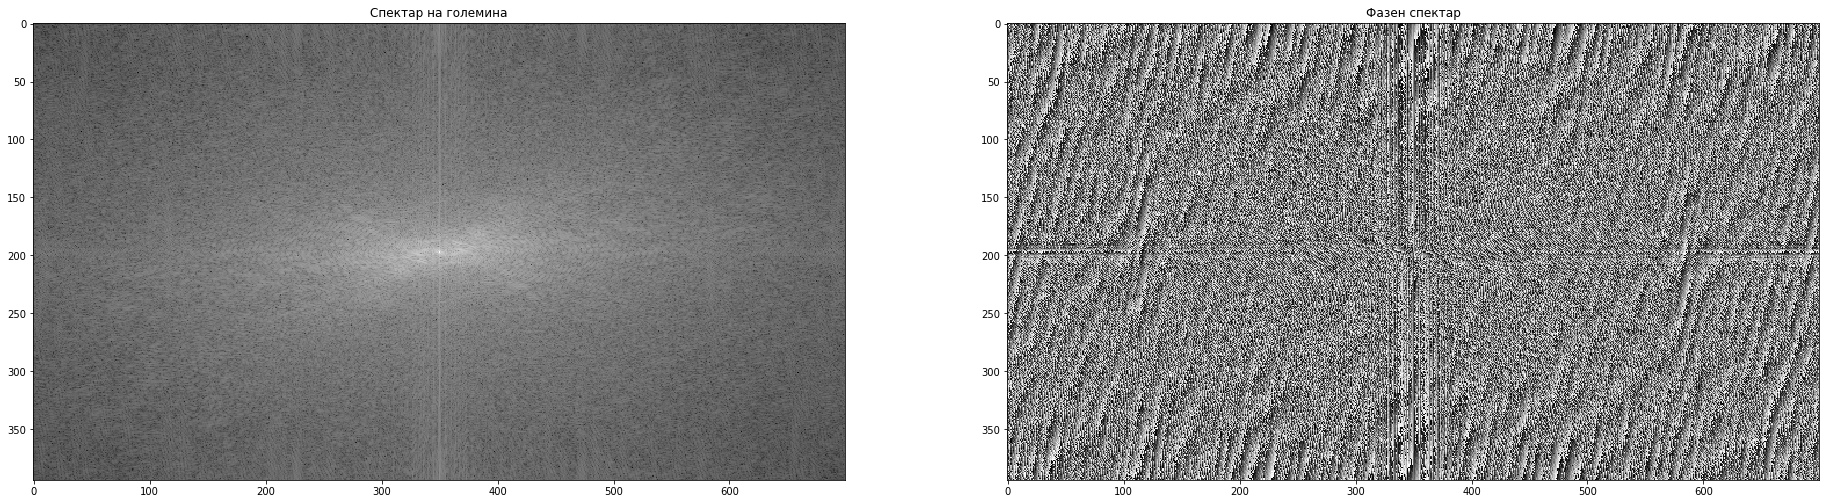

In [16]:
# Спектарот на големина (magnitude spectrum)
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
slika=cv2.imread("C:\\Users\\atana\\OneDrive\\Desktop\\zebra.jpg",0)
frekvenciski_spektar = np.fft.fft2(slika)
centriranje_frekvencii = np.fft.fftshift(frekvenciski_spektar)
spekar_na_golemina = 20*np.log(np.abs(centriranje_frekvencii))
plt.subplot(121)
plt.imshow(spekar_na_golemina, "gray")
plt.title('Спектар на големина')
# Фазен спектар (phase spectrum)
frekvenciski_spektar = np.fft.fft2(slika)
centriranje_frekvencii = np.fft.fftshift(frekvenciski_spektar)
fazen_spektar = np.angle(centriranje_frekvencii)
plt.subplot(122)
plt.imshow(fazen_spektar, cmap='gray')
plt.title("Фазен спектар")
plt.show()

Доколку се земат во пар, амплитудниот спектар и фазниот спектар уникатно ќе го опишат временскиот потпис на сигналот.
Големината на БФТ се однесува на колку енергија постои во синѕсоидните бранови за градење на сликата, додека фазата се однесува на позицијата на тие бранови. 
Одделно земено, фазниот спектар е поважен од амплитудниот, заради тоа што доколку амплитудниот спектар е нарушен, фазниот спектар ќе остане недопрен и сигналот ќе може да се релативно прецизно да се реконструира со помош на ИБФТ.

##### Мој дел - Споредба помеѓу спектарот на големина и спектар на центрирани фреквенции:

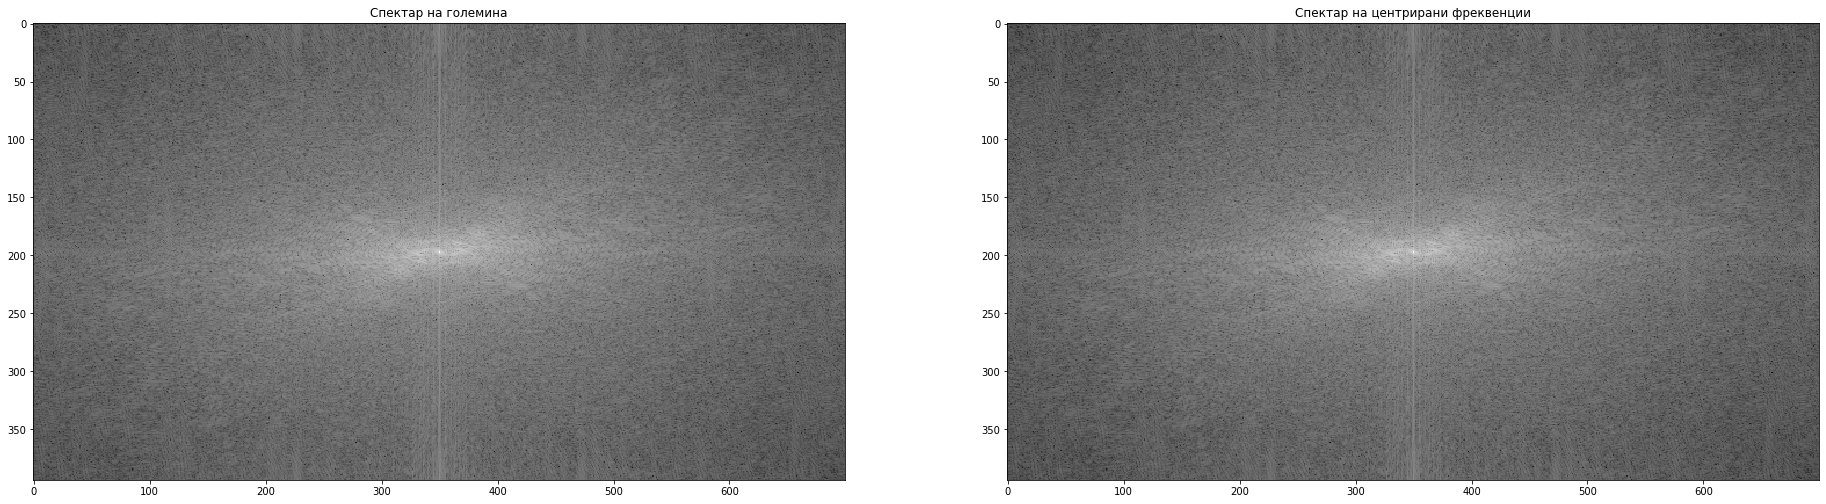

In [17]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
slika=cv2.imread("C:\\Users\\atana\\OneDrive\\Desktop\\zebra.jpg",0)
# Спектар на големина (magnitude spectrum)
frekvenciski_spektar = np.fft.fft2(slika)
centriranje_frekvencii = np.fft.fftshift(frekvenciski_spektar)
spekar_na_golemina = 20*np.log(np.abs(centriranje_frekvencii))
plt.subplot(121)
plt.imshow(spekar_na_golemina, "gray")
plt.title('Спектар на големина')
# Спектар на центрирани фреквенции
centriranje_frekvencii=np.fft.fftshift(frekvenciski_spektar)
plt.subplot(122)
plt.imshow(np.log(1+np.abs(centriranje_frekvencii)), "gray")
plt.title("Спектар на центрирани фреквенции")
plt.show()

Доколку се споредат спектарот на големина и спектарот на центрирани фреквенции, можам да речам дека станува збор за истата слика, заради фактот што спектарот на големина претставува пермутација на спектарот на центрирани фреквенции. Не зависно која од нив ќе се употреби, резултатот е ист, а тоа се должи на употребата на дводимензионаната Брза Фуриева Трансформација во кодот.